# Linear Regression using the Fast.ai Learner

Task: Fit a linear regression by gradient descent.

## Setup

In [1]:
from fastai.vision.all import *

This function will make a `DataLoaders` object out of an arary dataset.

In [2]:
def make_dataloaders(x, y_true, splitter, batch_size):
    data = L(zip(x, y_true))
    train_indices, valid_indices = splitter(data)
    return DataLoaders(
        DataLoader(data[train_indices], batch_size=batch_size, shuffle=True),
        DataLoader(data[valid_indices], batch_size=batch_size)
    )   

Here are utility functions to plot the first axis of a dataset and a model's predictions.

In [3]:
def plot_data(x, y): plt.scatter(x[:, 0], y[:, 0], s=1)
def plot_model(x, model):
    x = torch.sort(x)[0]
    y_pred = model(x).detach()
    plt.plot(x[:, 0], y_pred[:, 0], 'r')

## Task

Remember this? Suppose we have a dataset with just a single feature `x` and continuous outcome variable `y`.

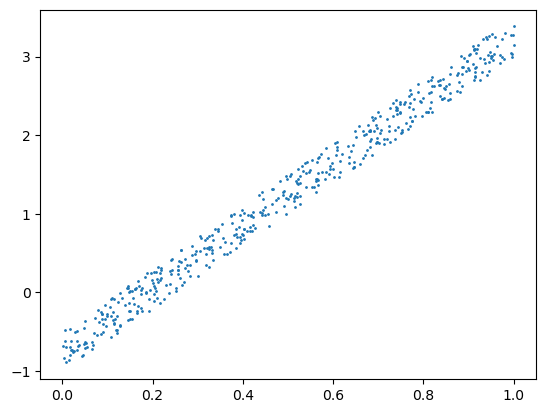

In [4]:
torch.manual_seed(0)
x = torch.rand(500, 1)
noise = torch.rand_like(x) * .5
y_true = 4 * x - 1 + noise

plot_data(x, y_true)

Let's fit a line to that!

In previous notebooks we manually wrote out `y_pred = weights * x + bias`, and manually took a step that reduced the mean squared error `mse_loss = (y_pred - y_true).pow(2).mean()`. In this notebook, we'll use `nn.Linear` and fastai's `Learner` class.

First we'll make a fastai-compatible `DataLoaders` from this dataset. You should know everything you need to understand how this works, but don't worry about it on the first time around.

In [5]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)
batch_size = 5
dataloaders = make_dataloaders(x, y_true, splitter, batch_size=batch_size)

## Solution

Use the `one_batch` method to inspect one batch of the `train` dataloader. Be sure that you can explain the shapes of everything you see. (Look above to see the `batch_size` that this dataloader uses.)

In [6]:
batch = dataloaders.train.one_batch()
X_batch, y_batch = batch # unpack the tuple
X_batch

tensor([[0.9970],
        [0.7932],
        [0.1689],
        [0.6471],
        [0.7705]])

In [7]:
y_batch

tensor([[ 3.0336],
        [ 2.4343],
        [-0.1678],
        [ 1.6605],
        [ 2.5782]])

**Fill in the blanks to construct a `model`**:

```
model = nn.Linear(in_features=..., out_features=..., bias=...)
```

- For `in_features`, think about the shape of the input data. Remember that the model will be applied to each row of the batch, so the model dimensionality doesn't depend on the batch size.
- For `out_features`, think about the shape of the output data.
- `bias` is `True` or `False`, telling the model whether to include a bias term. Look at the data to see if we'll probably need a bias term or not.

In [8]:
model = nn.Linear(in_features=..., out_features=..., bias=...)

To check that we got it right, **call the `model` with the input data from the example batch**. Note that the model's weights and biases were initialized randomly, so the numbers in your output will probably be different from your neighbors'. (We did set a manual seed, so that hopefully means that the random initialization actually comes out the same for everyone.)

In [9]:
y_pred = model(X_batch)
y_pred

tensor([[-0.3116],
        [-0.2132],
        [ 0.0885],
        [-0.1426],
        [-0.2022]], grad_fn=<AddmmBackward0>)

Let's look at what the model currently predicts on all the data.

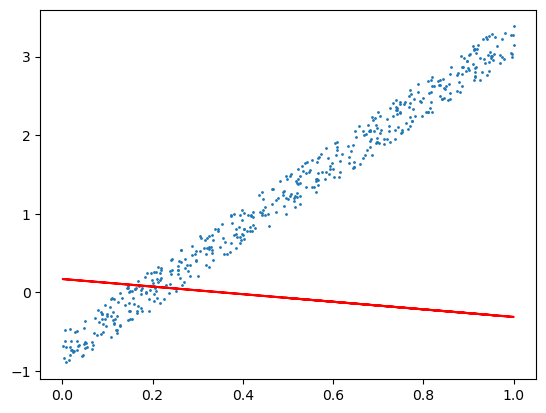

In [10]:
plot_data(x, y_true)
plot_model(x, model)

Pretty bad, huh? Let's evaluate the error on the batch we got:

In [11]:
mse_loss = (y_pred - ...
mse_loss

tensor(5.8493, grad_fn=<MeanBackward0>)

**Create a `loss_func` by instantiating an `nn.MSELoss`.**

In [12]:
loss_func = nn.MSELoss()

**Evaluate the loss on the  `loss_func` on the example batch.**  Check that the numerical value of the output matches exactly. (It'll be a different `grad_fn`.)

Note: PyTorch loss functions take inputs, then targets. Warning: If you ever happen to use `sklearn` loss functions, they use the reverse order.

In [13]:
loss_func(y_pred, y_batch)

tensor(5.8493, grad_fn=<MseLossBackward0>)

**Construct a `Learner`.**

* Use the `dataloaders`, `model`, and `loss_func` constructed above.
* Use `SGD` as the `opt_func`.
* The default `metric` is fine so you can omit it. (If you want to, you may add Mean Absolute Error (`mae`).)

In [14]:
learner = Learner(dataloaders, model, loss_func=loss_func)

**Fit the Learner for 10 epochs at the default learning rate.**

Plot the loss when it's finished.

epoch,train_loss,valid_loss,time
0,0.773683,0.819640,00:00
1,0.749985,0.758604,00:00
2,0.725767,0.716818,00:00
3,0.680736,0.681658,00:00
4,0.636986,0.652067,00:00
5,0.618167,0.625293,00:00
6,0.605204,0.601102,00:00
7,0.576772,0.579543,00:00
8,0.549434,0.557323,00:00
9,0.528084,0.536412,00:00


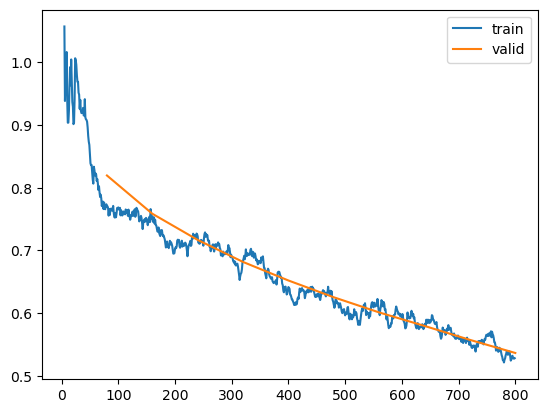

In [32]:
learner.reset_parameters()
learner.fit(n_epoch=10, lr=0.001)
learner.recorder.plot_loss()

**Now let's look at what the model predicts.**

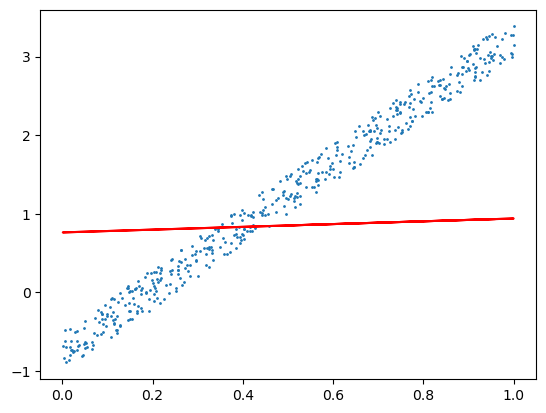

In [16]:
plot_data(x, y_true)
plot_model(x, model)

**Not there yet! Try different learning rates in the `learner.fit` to see if you can get it to train to convergence in 10 epochs.**

Remember to Restart and Run All to check that you're starting with a clean model.

## Analysis

Inspect the `weight` and `bias` attributes of `model`. How close are they to the ideal values? (Peek at how the data was generated.) Explain.